In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Importing Liabriaries and Supress Warnings

#### 1.1 Importing Data Structures

In [1]:
import pandas as pd
import numpy as np
import re
import os

#### 1.2 Importing Graphs

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.3 Importing Libraries from Sklearn



In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

#### 1.4 Importing Warnings

In [8]:
import warnings
warnings.filterwarnings('ignore')

#### 1.5 Increasing Row and Column Size

In [9]:
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)

NameError: ignored

### 2. Loading Data

#### 2.1 Importing CSV Data from file

In [ ]:
telecom_churn = pd.read_csv('/content/drive/MyDrive/Upgrad/Telecom Churn Prediction/train.csv')
telecom_churn_test=pd.read_csv("/content/drive/MyDrive/Upgrad/Telecom Churn Prediction/test.csv")
data_dict=pd.read_csv("/content/drive/MyDrive/Upgrad/Telecom Churn Prediction/data_dictionary.csv")


### 3. Understanding Data 

In [ ]:
print(telecom_churn.shape)
print(telecom_churn_test.shape)

In [ ]:
data_dict

In [ ]:
telecom_churn.head()

In [ ]:
telecom_churn.shape

In [ ]:
X_train=telecom_churn.copy()
X_test=telecom_churn_test.copy()

In [ ]:
telecom_churn.dtypes

### 4. Data Prepocessing

#### 4.1  Identification Potentially Useful Attributes

In [ ]:
ids = ['id','circle_id']
total_amounts = [i for i in list(telecom_churn.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(telecom_churn.columns) if re.search('total.+og.+mou',i)]
offnetwork_minutes = [i for i in list(telecom_churn.columns) if re.search('offnet',i)]
average_revenue_3g = [i for i in list(telecom_churn.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(telecom_churn.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(telecom_churn.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(telecom_churn.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(telecom_churn.columns) if re.search('aon',i)]

#Storing them in a single flat list
variables = [*ids, 
             *total_amounts, 
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             'churn_probability']

telecom_churn = telecom_churn[variables].set_index('id')

In [ ]:
telecom_churn.head()

In [ ]:
telecom_churn.info(verbose=1)

In [ ]:
telecom_churn.describe(include="all")

In [ ]:
# Checking the Churn Rate
churn = (sum(telecom_churn['churn_probability'])/len(telecom_churn['churn_probability'].index))*100
churn

In [ ]:
telecom_churn['circle_id'].value_counts()

In [ ]:
telecom_churn = telecom_churn.drop('circle_id',axis=1)

#### 4.2 Create X, y and then Train test split

In [ ]:
X=telecom_churn.drop('churn_probability',axis=1)
y=telecom_churn['churn_probability']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
y_train.head()

In [ ]:
X_train.head()

#### 4.3 Handling Missing data

##### 4.3.1 Checking Missing Values

In [ ]:
# Checking percentage of missing values before removing the missing values
round(100*(X_train.isnull().sum()/len(X_train.index)), 2)

##### 4.3.2 Removing Missing Values

In [ ]:
# Removing missing values that more than 73 % from Train data
X_train=X_train.drop(X_train.columns[X_train.apply(lambda col: col.isnull().sum()/len(X_train) > 0.73)],axis=1)

In [ ]:
# Removing missing values that more than 73 % from Test data
X_test=X_test.drop(X_test.columns[X_test.apply(lambda col: col.isnull().sum()/len(X_test) > 0.73)],axis=1)

In [ ]:
# Checking percentage of missing values after removing the missing values
round(100*(X_train.isnull().sum()/len(X_train.index)), 2)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

##### 4.3.3 Imputing Missing Values

In [30]:
offnet_missing_values=['offnet_mou_6','offnet_mou_7','offnet_mou_8']

In [31]:
median_imputation = SimpleImputer(missing_values=np.nan, strategy='median')

In [32]:
X_train[offnet_missing_values]=median_imputation.fit_transform(X_train[offnet_missing_values])

In [33]:
X_test[offnet_missing_values]=median_imputation.fit_transform(X_test[offnet_missing_values])

In [34]:
X_train.isnull().sum()

total_rech_amt_6    0
total_rech_amt_7    0
total_rech_amt_8    0
total_og_mou_6      0
total_og_mou_7      0
total_og_mou_8      0
offnet_mou_6        0
offnet_mou_7        0
offnet_mou_8        0
vol_3g_mb_6         0
vol_3g_mb_7         0
vol_3g_mb_8         0
vol_2g_mb_6         0
vol_2g_mb_7         0
vol_2g_mb_8         0
aon                 0
dtype: int64

In [35]:
X_test.isnull().sum()

total_rech_amt_6    0
total_rech_amt_7    0
total_rech_amt_8    0
total_og_mou_6      0
total_og_mou_7      0
total_og_mou_8      0
offnet_mou_6        0
offnet_mou_7        0
offnet_mou_8        0
vol_3g_mb_6         0
vol_3g_mb_7         0
vol_3g_mb_8         0
vol_2g_mb_6         0
vol_2g_mb_7         0
vol_2g_mb_8         0
aon                 0
dtype: int64

In [36]:
import missingno as msno

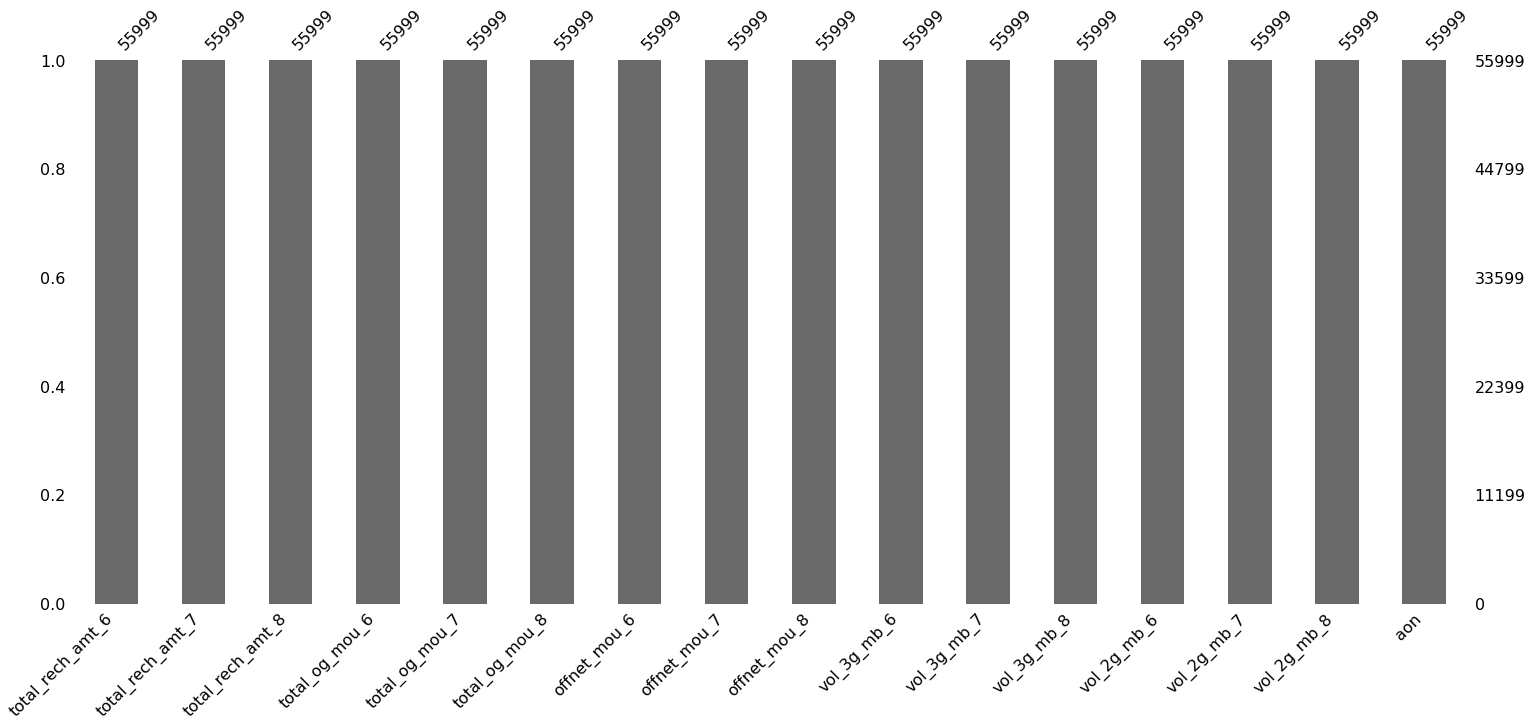

In [37]:
msno.bar(X_train)

In [38]:
X_train.describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,327.811854,321.025108,323.478937,306.429707,310.765246,304.822583,194.530026,192.666066,190.668662,122.938196,128.583345,135.521906,51.187053,51.012304,49.913344,1222.832640
std,380.114409,374.008207,388.530337,466.174772,481.140761,480.123986,310.558883,317.337807,315.647837,558.236033,539.005548,561.215419,211.451926,213.048610,215.497856,953.849631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000
25%,110.000000,100.000000,90.000000,45.250000,43.240000,38.780000,37.010000,34.140000,34.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,469.000000
50%,230.000000,220.000000,225.000000,145.910000,142.190000,138.590000,96.580000,91.990000,91.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,869.000000
75%,440.000000,430.000000,436.000000,374.720000,380.645000,372.650000,223.770000,217.375000,216.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1818.000000
max,17840.000000,16725.000000,20405.000000,10674.030000,8285.640000,14043.060000,8362.360000,7043.980000,14007.340000,45735.400000,27600.290000,30036.060000,10285.900000,7873.550000,11117.610000,4337.000000


#### 5. Outlier Treatment

##### 5.1 Checking Outliers

In [39]:
X_train.nunique()

total_rech_amt_6     1987
total_rech_amt_7     2021
total_rech_amt_8     2037
total_og_mou_6      29008
total_og_mou_7      29080
total_og_mou_8      28832
offnet_mou_6        23413
offnet_mou_7        23287
offnet_mou_8        23156
vol_3g_mb_6          7919
vol_3g_mb_7          8342
vol_3g_mb_8          8597
vol_2g_mb_6          9546
vol_2g_mb_7          9497
vol_2g_mb_8          9443
aon                  3429
dtype: int64

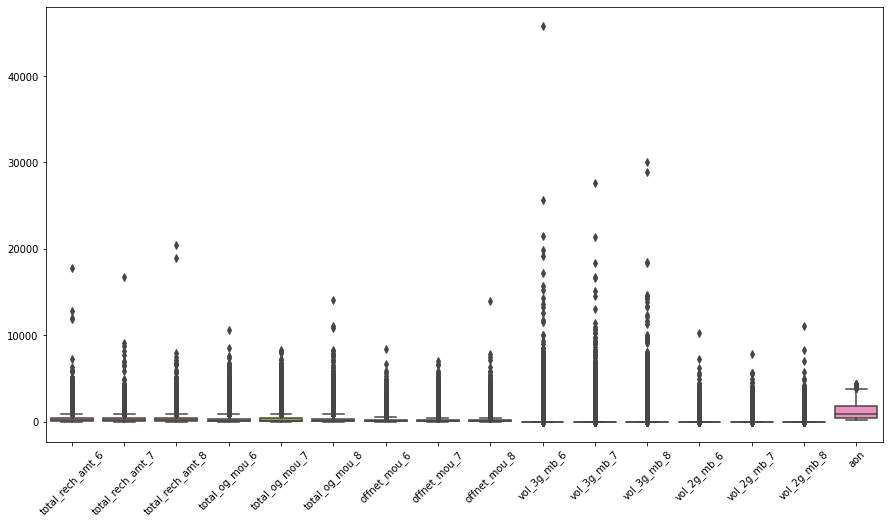

In [40]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train)
plt.show()

##### 5.2 Removing Outliers

In [41]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array


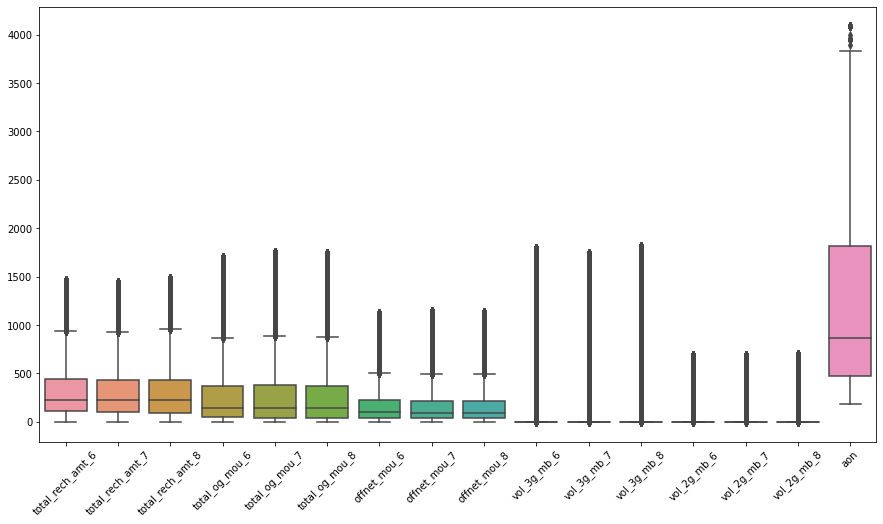

In [42]:
X_train_new = X_train.apply(cap_outliers, axis=0)

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train)

### 6. Feature Scaling

In [43]:
X_train.describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,317.979084,311.097737,313.613369,290.092133,293.745801,288.333021,182.255915,180.115879,178.795358,101.684198,105.651174,112.234815,41.107628,40.364241,39.442828,1222.763843
std,312.875878,312.532944,317.807800,376.897072,386.586807,383.893400,235.729205,239.112290,236.713761,326.669970,331.086379,344.167689,130.831674,129.587542,128.355380,953.638076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000
25%,110.000000,100.000000,90.000000,45.250000,43.240000,38.780000,37.010000,34.140000,34.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,469.000000
50%,230.000000,220.000000,225.000000,145.910000,142.190000,138.590000,96.580000,91.990000,91.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,869.000000
75%,440.000000,430.000000,436.000000,374.720000,380.645000,372.650000,223.770000,217.375000,216.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1818.000000
max,1468.155079,1443.049727,1489.069949,1704.954022,1754.187528,1745.194540,1126.206675,1144.679487,1137.612174,1797.646296,1745.599990,1819.168164,685.542831,690.158135,696.406911,4084.381534


In [44]:
X_train_cols=X_train.columns

In [45]:
scale = StandardScaler()
X_train1= scale.fit_transform(X_train)

In [46]:
X_train2=pd.DataFrame(X_train1,columns=X_train_cols)
X_train2.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
0,0.402786,0.857205,0.551869,0.691542,0.831035,1.005905,1.365367,1.326644,1.456898,-0.311278,-0.319107,-0.326108,4.925726,3.300005,1.643321,-0.666678
1,0.920568,0.783612,0.322168,2.351586,2.023611,1.041046,4.004422,3.554070,1.964900,-0.311278,-0.319107,-0.326108,-0.314205,-0.311485,-0.307297,-0.578593
2,0.294116,0.828407,0.523550,0.090975,1.070052,0.357855,0.573223,2.205235,1.043103,-0.311278,-0.319107,-0.326108,-0.314205,-0.311485,-0.307297,-1.067253
3,-0.690309,-0.774638,-0.892413,-0.681763,-0.759851,-0.748009,-0.659856,-0.753276,-0.751485,0.066263,0.316020,-0.326108,-0.221796,-0.039003,-0.307297,-1.068301
4,0.581772,1.404352,0.586481,-0.506143,-0.516230,-0.512056,-0.312972,-0.388548,-0.465821,-0.311278,-0.319107,-0.326108,-0.314205,-0.311485,-0.307297,0.439622


In [47]:
X_train2.shape

(55999, 16)

In [48]:
X_train2.describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
count,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04
mean,8.501288e-17,-4.129469e-16,1.152829e-16,8.880496e-16,-1.974646e-18,2.718430e-16,6.740760e-20,-8.867668e-17,2.336427e-16,1.394574e-15,-2.462642e-15,1.654295e-15,-1.732930e-16,1.290445e-15,-1.508687e-15,8.364589e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.016320e+00,-9.954167e-01,-9.868108e-01,-7.696922e-01,-7.598511e-01,-7.510825e-01,-7.731649e-01,-7.532757e-01,-7.553298e-01,-3.112778e-01,-3.191074e-01,-3.261079e-01,-3.142052e-01,-3.114852e-01,-3.072967e-01,-1.093468e+00
25%,-6.647395e-01,-6.754476e-01,-7.036182e-01,-6.496318e-01,-6.479994e-01,-6.500639e-01,-6.161613e-01,-6.104964e-01,-6.103010e-01,-3.112778e-01,-3.191074e-01,-3.261079e-01,-3.142052e-01,-3.114852e-01,-3.072967e-01,-7.904158e-01
50%,-2.811974e-01,-2.914846e-01,-2.788294e-01,-3.825538e-01,-3.920391e-01,-3.900675e-01,-3.634538e-01,-3.685577e-01,-3.669247e-01,-3.112778e-01,-3.191074e-01,-3.261079e-01,-3.142052e-01,-3.114852e-01,-3.072967e-01,-3.709657e-01
75%,3.900013e-01,3.804505e-01,3.850998e-01,2.245404e-01,2.247877e-01,2.196384e-01,1.761108e-01,1.558241e-01,1.577220e-01,-3.112778e-01,-3.191074e-01,-3.261079e-01,-3.142052e-01,-3.114852e-01,-3.072967e-01,6.241796e-01
max,3.676174e+00,3.621897e+00,3.698673e+00,3.754008e+00,3.777818e+00,3.794998e+00,4.004422e+00,4.033972e+00,4.050569e+00,5.191715e+00,4.953280e+00,4.959642e+00,4.925726e+00,5.014369e+00,5.118367e+00,3.000764e+00


### 7. Exploratory Data Analysis

#### 7.1 Plotting Heatmap

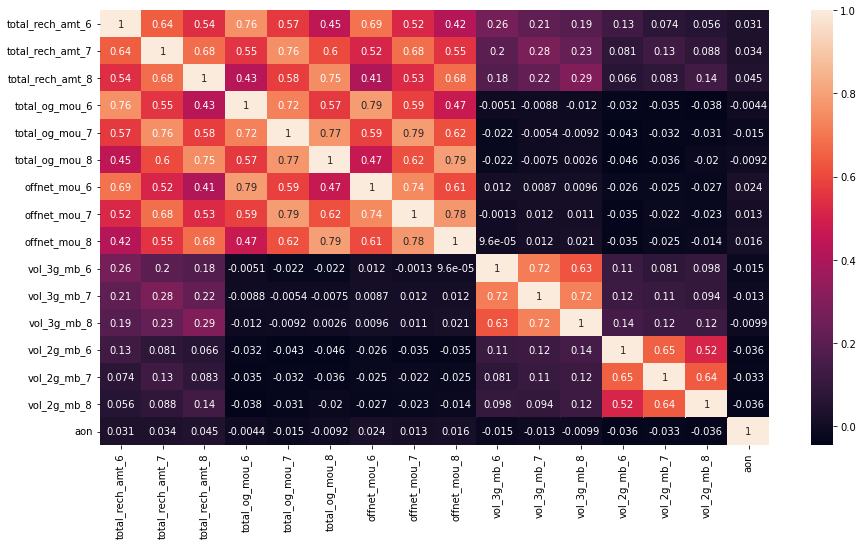

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train2.corr(),annot=True)

### 8.Feature Engineering And Selection

#### 8.1 Performing PCA Train Data

In [50]:
pca = PCA(random_state=42)

In [51]:
pca.fit(X_train2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pca.components_

array([[ 3.14882265e-01,  3.40406839e-01,  3.16322147e-01,
         3.23848001e-01,  3.54962282e-01,  3.33198122e-01,
         3.20344904e-01,  3.47143380e-01,  3.27716628e-01,
         5.74712569e-02,  6.57688909e-02,  6.51930728e-02,
         1.11902440e-02,  1.42444893e-02,  1.47520378e-02,
         7.99710874e-03],
       [ 9.54411073e-02,  1.03555511e-01,  1.08015405e-01,
        -9.82271359e-02, -1.06243990e-01, -9.69950443e-02,
        -9.16062840e-02, -1.00044819e-01, -9.05492816e-02,
         4.27467424e-01,  4.50260436e-01,  4.42176419e-01,
         3.36245842e-01,  3.39574753e-01,  3.18809489e-01,
        -2.36868428e-02],
       [-2.27043928e-02, -1.17744888e-02, -1.68346456e-02,
         2.67421525e-02,  3.64807226e-02,  3.19625342e-02,
         2.45801669e-02,  3.30109514e-02,  2.89747046e-02,
        -3.41341022e-01, -3.49503856e-01, -3.14324236e-01,
         4.45874761e-01,  4.95428146e-01,  4.58413637e-01,
        -3.99832473e-02],
       [-4.34258614e-01,  6.01930717e

#### 8.2 Components From PCA

In [53]:
pca.components_

array([[ 3.14882265e-01,  3.40406839e-01,  3.16322147e-01,
         3.23848001e-01,  3.54962282e-01,  3.33198122e-01,
         3.20344904e-01,  3.47143380e-01,  3.27716628e-01,
         5.74712569e-02,  6.57688909e-02,  6.51930728e-02,
         1.11902440e-02,  1.42444893e-02,  1.47520378e-02,
         7.99710874e-03],
       [ 9.54411073e-02,  1.03555511e-01,  1.08015405e-01,
        -9.82271359e-02, -1.06243990e-01, -9.69950443e-02,
        -9.16062840e-02, -1.00044819e-01, -9.05492816e-02,
         4.27467424e-01,  4.50260436e-01,  4.42176419e-01,
         3.36245842e-01,  3.39574753e-01,  3.18809489e-01,
        -2.36868428e-02],
       [-2.27043928e-02, -1.17744888e-02, -1.68346456e-02,
         2.67421525e-02,  3.64807226e-02,  3.19625342e-02,
         2.45801669e-02,  3.30109514e-02,  2.89747046e-02,
        -3.41341022e-01, -3.49503856e-01, -3.14324236e-01,
         4.45874761e-01,  4.95428146e-01,  4.58413637e-01,
        -3.99832473e-02],
       [-4.34258614e-01,  6.01930717e

In [54]:
pca.explained_variance_ratio_

array([0.37452116, 0.17453984, 0.12178424, 0.06600577, 0.06278585,
       0.03541558, 0.03126428, 0.03019375, 0.02411034, 0.02038118,
       0.0191816 , 0.01548383, 0.00879503, 0.00775652, 0.00509252,
       0.00268852])

#### 8.3 Making Scree Plot For Explained Variance

In [55]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

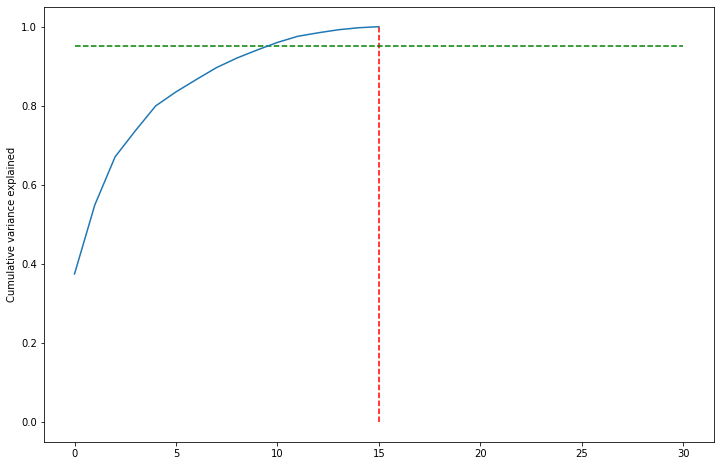

In [56]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()


#### 8.4 Perform PCA With 10 Components

In [57]:
pca_final = IncrementalPCA(n_components=10)

In [58]:
df_train_pca = pca_final.fit_transform(X_train2)

In [59]:
df_train_pca.shape

(55999, 10)

In [70]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [71]:
corrmat.shape

(10, 10)

#### 8.5 Plotting Heatmap For Corr Matrix

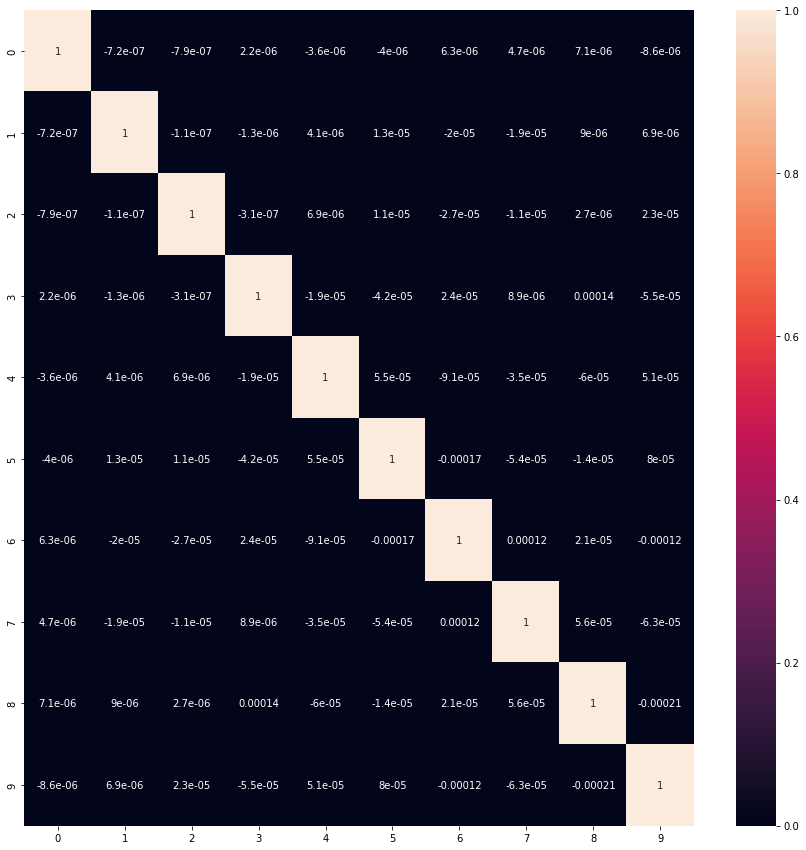

In [72]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

#### 8.6 Applying Transformation On Test Set

In [73]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(14000, 10)

#### 8.7 Applying Logistic Regression On Data of Principal Components

In [74]:
learner_pca = LogisticRegression()

In [75]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [76]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [77]:
pred_probs_train

array([[9.75644946e-01, 2.43550537e-02],
       [8.55267348e-01, 1.44732652e-01],
       [9.33665034e-01, 6.63349658e-02],
       ...,
       [9.98604082e-01, 1.39591751e-03],
       [9.99424605e-01, 5.75394665e-04],
       [9.99809489e-01, 1.90511308e-04]])

#### 8.8 Making Predictions On Test Set

In [78]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [79]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.76'

#### 8.9 Train PCA score

In [80]:
learner_pca.score(df_train_pca, y_train)

0.8996232075572778

#### 8.10 Test PCA score

In [81]:
learner_pca.score(df_test_pca, y_test)

0.9005

### 9. Model Building

#### 9.1 Model Building Using Logistic Regression on Seen Data

In [82]:
# Build a Logistic Regression model using SKLearn 
Log_Reg = LogisticRegression()
Log_Reg_Model = Log_Reg.fit(X_train2,y_train)

In [83]:
pred_prob_logreg_train=Log_Reg_Model.predict_proba(X_train2)

In [84]:
pred_prob_logreg_test=Log_Reg_Model.predict_proba(X_test)

In [85]:
y_test_pred_df = pd.DataFrame(pred_prob_logreg_test)
# Converting to column dataframe
y_test_pred_final = y_test_pred_df.iloc[:,[1]]
# Let's see the head
y_test_pred_final.head()

,1
0,0.000000e+00
1,0.000000e+00
2,1.356353e-85
3,8.968213e-69
4,0.000000e+00


In [86]:
y_test_final=pd.DataFrame(y_test)
y_test_final.head()

,churn_probability
id,
2039,0
50712,0
44634,1
34846,1
8109,0


In [87]:
y_test_final.reset_index(inplace=True)

In [88]:
y_test_final.head()

,id,churn_probability
0,2039,0
1,50712,0
2,44634,1
3,34846,1
4,8109,0


In [89]:
final_test=pd.concat([y_test_final,y_test_pred_final],axis=1)
final_test.head()

,id,churn_probability,1
0,2039,0,0.000000e+00
1,50712,0,0.000000e+00
2,44634,1,1.356353e-85
3,34846,1,8.968213e-69
4,8109,0,0.000000e+00


In [90]:
final_test= final_test.rename(columns={ 1 : 'Churn_pred_Prob'})

In [91]:
final_test.head()

,id,churn_probability,Churn_pred_Prob
0,2039,0,0.000000e+00
1,50712,0,0.000000e+00
2,44634,1,1.356353e-85
3,34846,1,8.968213e-69
4,8109,0,0.000000e+00


In [92]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
final_test['predicted'] = final_test.Churn_pred_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
final_test.head()

,id,churn_probability,Churn_pred_Prob,predicted
0,2039,0,0.000000e+00,0
1,50712,0,0.000000e+00,0
2,44634,1,1.356353e-85,0
3,34846,1,8.968213e-69,0
4,8109,0,0.000000e+00,0


In [93]:
# Let's check the overall accuracy.
metrics.accuracy_score(final_test['churn_probability'], final_test['predicted'])

0.9111428571428571

In [94]:
## Let's make a confusion matrix to analyze how each class is being predicted by the model.

confusion_matrix(final_test['churn_probability'], final_test['predicted'])

array([[12338,   235],
       [ 1009,   418]])

In [95]:
precision_score(final_test['churn_probability'], final_test['predicted'])

0.6401225114854517

In [96]:
recall_score(final_test['churn_probability'], final_test['predicted'])

0.29292221443587946

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

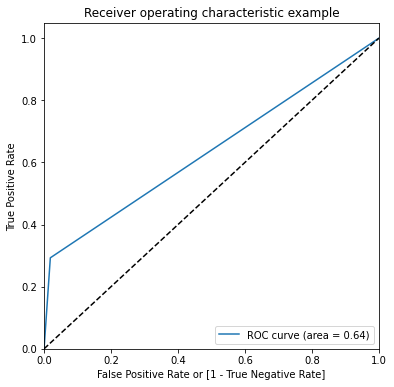

(array([0.        , 0.01869085, 1.        ]),
 array([0.        , 0.29292221, 1.        ]),
 array([2, 1, 0]))

In [99]:
draw_roc(final_test['churn_probability'], final_test['predicted'])

9.2 Model Building Using Logistic Regression on Unseen Data

In [100]:
telecom_churn_test.shape

(30000, 171)

In [101]:
new_vars=X_train2.columns
new_vars

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'aon'],
      dtype='object')

In [102]:
submission_data = telecom_churn_test.set_index('id')[new_vars]
submission_data.shape


(30000, 16)

In [103]:
submission_data.isnull().sum()/len(submission_data)

total_rech_amt_6    0.000000
total_rech_amt_7    0.000000
total_rech_amt_8    0.000000
total_og_mou_6      0.000000
total_og_mou_7      0.000000
total_og_mou_8      0.000000
offnet_mou_6        0.038967
offnet_mou_7        0.039067
offnet_mou_8        0.055833
vol_3g_mb_6         0.000000
vol_3g_mb_7         0.000000
vol_3g_mb_8         0.000000
vol_2g_mb_6         0.000000
vol_2g_mb_7         0.000000
vol_2g_mb_8         0.000000
aon                 0.000000
dtype: float64

In [104]:
submission_data.isnull().sum()/len(submission_data)

total_rech_amt_6    0.000000
total_rech_amt_7    0.000000
total_rech_amt_8    0.000000
total_og_mou_6      0.000000
total_og_mou_7      0.000000
total_og_mou_8      0.000000
offnet_mou_6        0.038967
offnet_mou_7        0.039067
offnet_mou_8        0.055833
vol_3g_mb_6         0.000000
vol_3g_mb_7         0.000000
vol_3g_mb_8         0.000000
vol_2g_mb_6         0.000000
vol_2g_mb_7         0.000000
vol_2g_mb_8         0.000000
aon                 0.000000
dtype: float64

In [105]:
submission_data[offnet_missing_values]=median_imputation.fit_transform(submission_data[offnet_missing_values])

In [106]:
prob_telecom_churn_test = Log_Reg_Model.predict_proba(submission_data)

In [107]:
prob_telecom_churn_test 

array([[1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       ...,
       [1.00000000e+000, 2.70794847e-211],
       [1.00000000e+000, 4.45377422e-137],
       [1.00000000e+000, 0.00000000e+000]])

In [108]:
prob_telecom_churn_test_df = pd.DataFrame(prob_telecom_churn_test)
# Converting to column dataframe
prob_telecom_churn_test_final = prob_telecom_churn_test_df.iloc[:,[1]]
# Let's see the head
prob_telecom_churn_test_final.head()

,1
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,5.428513e-258
4,0.000000e+00


In [109]:
submission_data.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
id,,,,,,,,,,,,,,,,
69999,103,90,60,91.94,52.39,57.94,60.16,32.16,34.83,0.0,0.0,0.0,0.0,0.0,0.0,1692
70000,500,500,500,549.86,663.06,415.59,474.34,621.84,394.94,0.0,0.0,0.0,0.0,0.0,0.0,2533
70001,500,1000,1000,0.00,0.00,0.00,16.98,45.81,45.04,0.0,0.0,0.0,0.0,0.0,0.0,277
70002,110,260,0,45.36,207.18,24.01,40.04,205.01,24.01,0.0,0.0,0.0,0.0,0.0,0.0,1244
70003,356,490,546,514.79,638.28,779.78,60.94,23.84,74.16,0.0,0.0,0.0,0.0,0.0,0.0,462


In [110]:
submission_data.reset_index(inplace=True)

In [111]:
submission_data

,id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
0,69999,103,90,60,91.94,52.39,57.94,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,1692
1,70000,500,500,500,549.86,663.06,415.59,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,2533
2,70001,500,1000,1000,0.00,0.00,0.00,16.98,45.81,45.04,0.00,0.00,0.00,0.00,0.00,0.00,277
3,70002,110,260,0,45.36,207.18,24.01,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,1244
4,70003,356,490,546,514.79,638.28,779.78,60.94,23.84,74.16,0.00,0.00,0.00,0.00,0.00,0.00,462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99994,669,559,440,402.39,407.69,507.38,190.36,166.14,221.96,45.07,0.00,0.00,21.98,0.00,0.00,1255
29996,99995,317,298,496,364.03,591.36,840.03,108.53,124.11,189.76,0.00,0.00,0.00,0.00,0.00,0.00,2258
29997,99996,150,0,240,48.33,31.64,49.64,37.24,16.74,45.28,0.00,0.00,0.00,0.00,0.00,0.00,440
29998,99997,1286,876,307,1976.84,1112.11,332.63,1854.09,1088.83,306.16,0.00,0.00,0.00,0.00,0.00,0.00,810


In [112]:
submission_data=pd.concat([submission_data,prob_telecom_churn_test_final],axis=1)
submission_data

,id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,1
0,69999,103,90,60,91.94,52.39,57.94,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,1692,0.000000e+00
1,70000,500,500,500,549.86,663.06,415.59,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,2533,0.000000e+00
2,70001,500,1000,1000,0.00,0.00,0.00,16.98,45.81,45.04,0.00,0.00,0.00,0.00,0.00,0.00,277,0.000000e+00
3,70002,110,260,0,45.36,207.18,24.01,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,1244,5.428513e-258
4,70003,356,490,546,514.79,638.28,779.78,60.94,23.84,74.16,0.00,0.00,0.00,0.00,0.00,0.00,462,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99994,669,559,440,402.39,407.69,507.38,190.36,166.14,221.96,45.07,0.00,0.00,21.98,0.00,0.00,1255,0.000000e+00
29996,99995,317,298,496,364.03,591.36,840.03,108.53,124.11,189.76,0.00,0.00,0.00,0.00,0.00,0.00,2258,0.000000e+00
29997,99996,150,0,240,48.33,31.64,49.64,37.24,16.74,45.28,0.00,0.00,0.00,0.00,0.00,0.00,440,2.707948e-211
29998,99997,1286,876,307,1976.84,1112.11,332.63,1854.09,1088.83,306.16,0.00,0.00,0.00,0.00,0.00,0.00,810,4.453774e-137


In [113]:
submission_data.rename(columns={1:'churn_prob'},inplace=True)

In [114]:
submission_data.head()

,id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_prob
0,69999,103,90,60,91.94,52.39,57.94,60.16,32.16,34.83,0.0,0.0,0.0,0.0,0.0,0.0,1692,0.000000e+00
1,70000,500,500,500,549.86,663.06,415.59,474.34,621.84,394.94,0.0,0.0,0.0,0.0,0.0,0.0,2533,0.000000e+00
2,70001,500,1000,1000,0.00,0.00,0.00,16.98,45.81,45.04,0.0,0.0,0.0,0.0,0.0,0.0,277,0.000000e+00
3,70002,110,260,0,45.36,207.18,24.01,40.04,205.01,24.01,0.0,0.0,0.0,0.0,0.0,0.0,1244,5.428513e-258
4,70003,356,490,546,514.79,638.28,779.78,60.94,23.84,74.16,0.0,0.0,0.0,0.0,0.0,0.0,462,0.000000e+00


In [115]:
submission_data['churn_probability']=submission_data.churn_prob.map( lambda x: 1 if x > 0.5 else 0)
output = submission_data[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


### 9.3 Model Building Using Random Forest

In [120]:
rf = RandomForestClassifier(n_estimators=10,max_depth=4,max_features=5,random_state=42,oob_score=True)

In [121]:
rf.fit(X_train2,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [122]:
rf.oob_score_

0.933534527402275

In [123]:
rf.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1608637542, splitter='best')

In [1]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train2)))
    print("Train Precision :", precision_score(y_train, dt_classifier.predict(X_train2)))
    print("Train Recall :", recall_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train2)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Precision :", precision_score(y_train, dt_classifier.predict(X_train2)))
    print("Test Recall :", recall_score(y_train, dt_classifier.predict(X_train2)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [10]:
evaluate_model(rf)

#### 9.3.1 Evaluating Model using GridSearchCV Random Forest On Seen Data

In [126]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [127]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [128]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [10]:
grid_search.fit(X_train2,y_train)

In [10]:
rf_best = grid_search.best_estimator_

In [ ]:
rf_best 

In [129]:
# Evaluating Grid search CV Random forest on Test Data

In [130]:
RF_test=RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=20,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [131]:
RF_test.fit(X_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [132]:
evaluate_model(RF_test)

Train Accuracy : 0.9362488615868141
Train Precision : 0.7827763496143959
Train Recall : 0.5277296360485269
Train Confusion Matrix:
[[50064   165]
 [ 5738    32]]
--------------------------------------------------
Test Accuracy : 0.9473571428571429
Test Precision : 0.7827763496143959
Test Recall : 0.5277296360485269
Test Confusion Matrix:
[[12483   155]
 [  582   780]]


Since Random Forest gives Accuracy Score 94 for the Test data, This Model can be considered for Predictions
As the Main Objective of the Model is to find out customers who are Churning , In the above model Precision score is quite good and Recall score is better than the previous model

##### Variable importance in RandomForest

In [133]:
RF_test.feature_importances_

array([0.01532691, 0.02590593, 0.17737435, 0.02083213, 0.06643684,
       0.41582424, 0.01993858, 0.02982809, 0.1346245 , 0.00150601,
       0.00499475, 0.01223023, 0.00511664, 0.0123859 , 0.03246553,
       0.02520938])

In [137]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": RF_test.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
5,total_og_mou_8,0.415824
2,total_rech_amt_8,0.177374
8,offnet_mou_8,0.134624
4,total_og_mou_7,0.066437
14,vol_2g_mb_8,0.032466
7,offnet_mou_7,0.029828
1,total_rech_amt_7,0.025906
15,aon,0.025209
3,total_og_mou_6,0.020832
6,offnet_mou_6,0.019939


9.3.2 Evaluating Model using GridSearchCV Random Forest On Unseen Data

In [138]:
RF_test_data = telecom_churn_test.set_index('id')[new_vars]
RF_test_data.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
id,,,,,,,,,,,,,,,,
69999,103,90,60,91.94,52.39,57.94,60.16,32.16,34.83,0.0,0.0,0.0,0.0,0.0,0.0,1692
70000,500,500,500,549.86,663.06,415.59,474.34,621.84,394.94,0.0,0.0,0.0,0.0,0.0,0.0,2533
70001,500,1000,1000,0.00,0.00,0.00,16.98,45.81,45.04,0.0,0.0,0.0,0.0,0.0,0.0,277
70002,110,260,0,45.36,207.18,24.01,40.04,205.01,24.01,0.0,0.0,0.0,0.0,0.0,0.0,1244
70003,356,490,546,514.79,638.28,779.78,60.94,23.84,74.16,0.0,0.0,0.0,0.0,0.0,0.0,462


In [139]:
RF_test_data.isnull().sum()

total_rech_amt_6       0
total_rech_amt_7       0
total_rech_amt_8       0
total_og_mou_6         0
total_og_mou_7         0
total_og_mou_8         0
offnet_mou_6        1169
offnet_mou_7        1172
offnet_mou_8        1675
vol_3g_mb_6            0
vol_3g_mb_7            0
vol_3g_mb_8            0
vol_2g_mb_6            0
vol_2g_mb_7            0
vol_2g_mb_8            0
aon                    0
dtype: int64

In [140]:
RF_test_data[offnet_missing_values]=median_imputation.fit_transform(RF_test_data[offnet_missing_values])

In [141]:
RF_test.predict(RF_test_data)

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
RF_test_data['churn_probability']=RF_test.predict(RF_test_data)
RF_test_data.reset_index(inplace=True)
output=RF_test_data[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


### 10 Submission File

In [10]:
output.to_csv('submission_rf.csv',index=False)